In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Bibliotecas utilizadas

In [2]:
df = pd.read_json("03092020_2kcomments.json")

In [3]:
df

,0
0,"Satisfação, não deixam nada a desejar..."
1,Não tive dificuldade de me comunicar com outro...
2,"No momento, não estou trabalhando em casa, e s..."
3,No momento não.
4,Qualidade de vinda e rendimento no trabalho
...,...
1995,Seria bom aos demais que também trabalhassem c...
1996,Até aumentou.
1997,"Economia de tempo com transporte, convivio com..."
1998,"O gestor está sempre disponível, mas também nã..."


In [4]:
#Criar nova coluna contendo instâncias separadas em um array e sem pontuação
retiraPontos = lambda x: x.replace(",","").replace(".","").replace(")","").replace("(","").split()
df["array"]=df.applymap(retiraPontos)
df.head()

#criar um dataframe com todas as palavras, vou usar o intertools
import itertools

listOfWord = list(itertools.chain.from_iterable(list(df["array"].values)))

#criar dataframe com todas as palavras

In [18]:
wordsDF = pd.DataFrame(listOfWord)
wordsDF.head()
pd.DataFrame(wordsDF[0].value_counts())
#filtrar preposição, artigo e pronome
def retirarString(x,n=1):
    if(len(x)<=n):
        return np.nan
    else:
        return x

def menosUm(x):
    if(x<=4):
        return np.nan
    else:
        return x
    
retirarString("i")
CU=wordsDF.applymap(lambda x: retirarString(x,5))[0].value_counts().apply(lambda x: menosUm(x)).dropna()


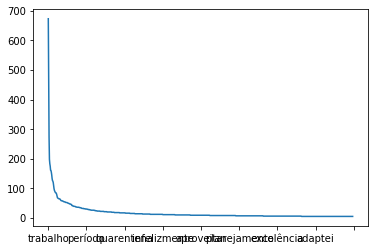

In [19]:
CU.plot(x="index",y=0)
plt